<a href="https://colab.research.google.com/github/MekhzZ/Learning_path_Data_Analyst/blob/main/Data_Wrangling_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Wrangling basics**

# Missing values


In [1]:
#loading modules
import numpy as np
import pandas as pd

In [2]:
#loading data

df = pd.read_csv('/content/500_Person_Gender_Height_Weight_Index.csv')

In [3]:
df.shape

(500, 4)

In [4]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [5]:
df = pd.read_csv('/content/missing_value_data.csv')

In [6]:
df.shape

(500, 4)

In [7]:
df.head()

,Gender,Height,Weight,Index
0,Male,174.0,96.0,4.0
1,Male,189.0,87.0,2.0
2,Female,NaN,110.0,4.0
3,Female,195.0,104.0,3.0
4,Male,149.0,61.0,3.0


In [8]:
df.isnull().sum()

Gender    0
Height    1
Weight    2
Index     1
dtype: int64

In [9]:
#filtering missing value rows

df[df.isnull().any(axis=1)]

,Gender,Height,Weight,Index
2,Female,NaN,110.0,4.0
6,Male,147.0,NaN,5.0
7,Male,154.0,NaN,5.0
13,Male,155.0,51.0,NaN


In [14]:
#removing rows containing missing values

df.dropna()

,Gender,Height,Weight,Index
0,Male,174.0,96.0,4.0
1,Male,189.0,87.0,2.0
3,Female,195.0,104.0,3.0
4,Male,149.0,61.0,3.0
5,Male,189.0,104.0,3.0
...,...,...,...,...
495,Female,150.0,153.0,5.0
496,Female,184.0,121.0,4.0
497,Female,141.0,136.0,5.0
498,Male,150.0,95.0,5.0


In [15]:
#fillinf missing values

new_df = df.copy()

In [16]:
new_df = new_df.fillna(0)

In [18]:
new_df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

# Duplicates

In [20]:
df.duplicated().sum()

11

In [21]:
df.drop_duplicates()

,Gender,Height,Weight,Index
0,Male,174.0,96.0,4.0
1,Male,189.0,87.0,2.0
2,Female,NaN,110.0,4.0
3,Female,195.0,104.0,3.0
4,Male,149.0,61.0,3.0
...,...,...,...,...
495,Female,150.0,153.0,5.0
496,Female,184.0,121.0,4.0
497,Female,141.0,136.0,5.0
498,Male,150.0,95.0,5.0


In [23]:
#removing duplicates by a specific column

df.drop_duplicates(subset=['Index'])

,Gender,Height,Weight,Index
0,Male,174.0,96.0,4.0
1,Male,189.0,87.0,2.0
3,Female,195.0,104.0,3.0
6,Male,147.0,NaN,5.0
13,Male,155.0,51.0,NaN
27,Male,187.0,62.0,1.0
60,Female,191.0,54.0,0.0


# Adding new columns and rows

In [24]:
#adding new column

df['sum_height_weight'] = df['Height'] + df['Weight']

In [25]:
df.head()

,Gender,Height,Weight,Index,sum_height_weight
0,Male,174.0,96.0,4.0,270.0
1,Male,189.0,87.0,2.0,276.0
2,Female,NaN,110.0,4.0,NaN
3,Female,195.0,104.0,3.0,299.0
4,Male,149.0,61.0,3.0,210.0


In [29]:
#adding a new row

df.loc[501] = df.loc[0].copy()
df.tail()

,Gender,Height,Weight,Index,sum_height_weight
496,Female,184.0,121.0,4.0,305.0
497,Female,141.0,136.0,5.0,277.0
498,Male,150.0,95.0,5.0,245.0
499,Male,173.0,131.0,5.0,304.0
501,Male,174.0,96.0,4.0,270.0


In [31]:
#appending rows and columns

l1 = [['x',10],['y',20]]
l2 = [['z',30],['w',40]]
name_age = pd.DataFrame(l1,columns=['name','age'])
name_weight = pd.DataFrame(l2,columns=['name','weight'])
name_age

,name,age
0,x,10
1,y,20


In [32]:
name_weight

,name,weight
0,z,30
1,w,40


In [33]:
#adding columns

pd.concat([name_age,name_weight],axis= 'columns')

,name,age,name,weight
0,x,10,z,30
1,y,20,w,40


In [36]:
pd.concat([name_age,name_weight],axis= 'rows').fillna(0)

,name,age,weight
0,x,10.0,0.0
1,y,20.0,0.0
0,z,0.0,30.0
1,w,0.0,40.0


# Joins

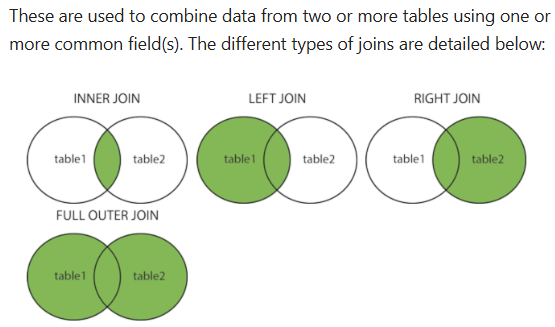

In [37]:
name_age

,name,age
0,x,10
1,y,20


In [40]:
l3 = [['z', 30], ['w', 40],['x',35],['y',45]]

In [41]:
name_weight = pd.DataFrame(l3, columns = ['name', 'weight'])

In [42]:
name_weight

,name,weight
0,z,30
1,w,40
2,x,35
3,y,45


In [46]:
#inner join

pd.merge(name_age,name_weight,how='inner',left_on='name',right_on='name')

,name,age,weight
0,x,10,35
1,y,20,45


In [47]:
#left join

pd.merge(name_age,name_weight,how='left',left_on='name',right_on='name')

,name,age,weight
0,x,10,35
1,y,20,45


In [48]:
# right join

pd.merge(name_age,name_weight,how='right',left_on='name',right_on='name')

,name,age,weight
0,z,NaN,30
1,w,NaN,40
2,x,10.0,35
3,y,20.0,45


In [49]:
# outer join

pd.merge(name_age,name_weight,how='outer',left_on='name',right_on='name')

,name,age,weight
0,x,10.0,35
1,y,20.0,45
2,z,NaN,30
3,w,NaN,40
